In [1]:
#XGBoost
import pandas as pd
import numpy as np

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
%matplotlib inline

In [5]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [6]:
#Cleaning data and feature engineering
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [7]:
data_exclude = data[~data["type"].isin(exclusion)]

In [8]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [52]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type_cleaned']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
X_train_train , X_train_val, y_train_train, y_train_val = train_test_split(X_train,y_train, test_size= 0.5)


In [53]:
print(XGBClassifier())

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [54]:
#XGB default parameters
xgb = XGBClassifier(objective='multi:softprob',
                    n_estimators = 200,
                    subsample= 0.9,
                    colsample_bytree = 0.6)
print(xgb)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.9,
              tree_method=None, validate_parameters=None, verbosity=None)


In [55]:
xgb.fit(X_train,y_train,
        eval_set=[(X_train_train, y_train_train), (X_train_val, y_train_val)],
        eval_metric= ['mlogloss','merror'],
        early_stopping_rounds=10,
        verbose=True)

lidation_1-mlogloss:0.21496	validation_1-merror:0.06197
[36]	validation_0-mlogloss:0.20535	validation_0-merror:0.05985	validation_1-mlogloss:0.21205	validation_1-merror:0.06114
[37]	validation_0-mlogloss:0.20187	validation_0-merror:0.05903	validation_1-mlogloss:0.20847	validation_1-merror:0.06038
[38]	validation_0-mlogloss:0.19881	validation_0-merror:0.05832	validation_1-mlogloss:0.20505	validation_1-merror:0.05920
[39]	validation_0-mlogloss:0.19562	validation_0-merror:0.05761	validation_1-mlogloss:0.20194	validation_1-merror:0.05820
[40]	validation_0-mlogloss:0.19290	validation_0-merror:0.05620	validation_1-mlogloss:0.19910	validation_1-merror:0.05696
[41]	validation_0-mlogloss:0.19007	validation_0-merror:0.05472	validation_1-mlogloss:0.19605	validation_1-merror:0.05608
[42]	validation_0-mlogloss:0.18785	validation_0-merror:0.05414	validation_1-mlogloss:0.19368	validation_1-merror:0.05543
[43]	validation_0-mlogloss:0.18564	validation_0-merror:0.05366	validation_1-mlogloss:0.19135	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
evals_result = xgb.evals_result()

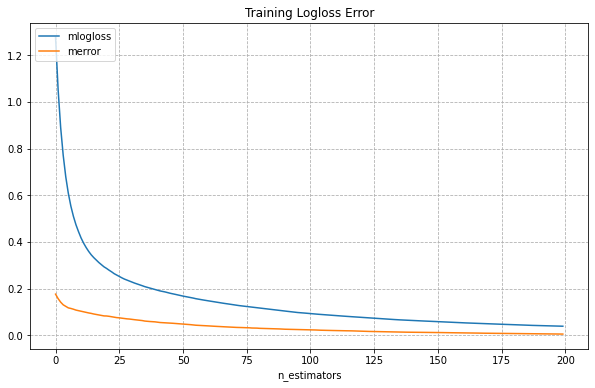

In [57]:


rcParams['figure.figsize'] = 10,6
plt.plot(evals_result.get('validation_0').get('mlogloss'))
plt.plot(evals_result.get('validation_0').get('merror'))
# plt.plot(evals_result.get('validation_1').get('mlogloss'))
plt.title('Training Logloss Error')
plt.legend(('mlogloss','merror'),loc=2)
plt.xlabel('n_estimators')
# plt.ylabel('mlogloss')
plt.grid(True, linestyle="--")
plt.show()

In [58]:
train_score = xgb.score(X_train,y_train,)
print("Training score: ",train_score)

Training score:  0.9946101964480311


In [59]:
# cv_score = cross_val_score(xgb,X_train,y_train, cv=10)
# print("CV mean score: ",cv_score.mean())

In [60]:
best_iteration = xgb.get_booster().best_ntree_limit
y_pred = xgb.predict(X_test, ntree_limit=best_iteration)
print(best_iteration)

200


In [61]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

        Alcove       0.78      0.58      0.67        55
         Attic       0.71      0.40      0.51        30
      Basement       1.00      0.07      0.12        15
          Bath       0.95      0.97      0.96      2179
       Bedroom       0.84      0.95      0.89      2423
       CarPort       0.76      0.67      0.71        87
        Closet       0.89      0.90      0.89       966
        Dining       0.87      0.88      0.87       265
  DraughtLobby       0.91      0.92      0.92       507
      Elevated       0.50      0.25      0.33        24
         Entry       0.90      0.94      0.92      1228
        Garage       0.75      0.81      0.78       129
          Hall       0.59      0.19      0.29        52
       Kitchen       0.96      0.94      0.95      1379
    LivingRoom       0.84      0.91      0.87      1267
        Office       0.50      0.03      0.06        63
       Outdoor       0.96      0.98      0.97  

<AxesSubplot:>

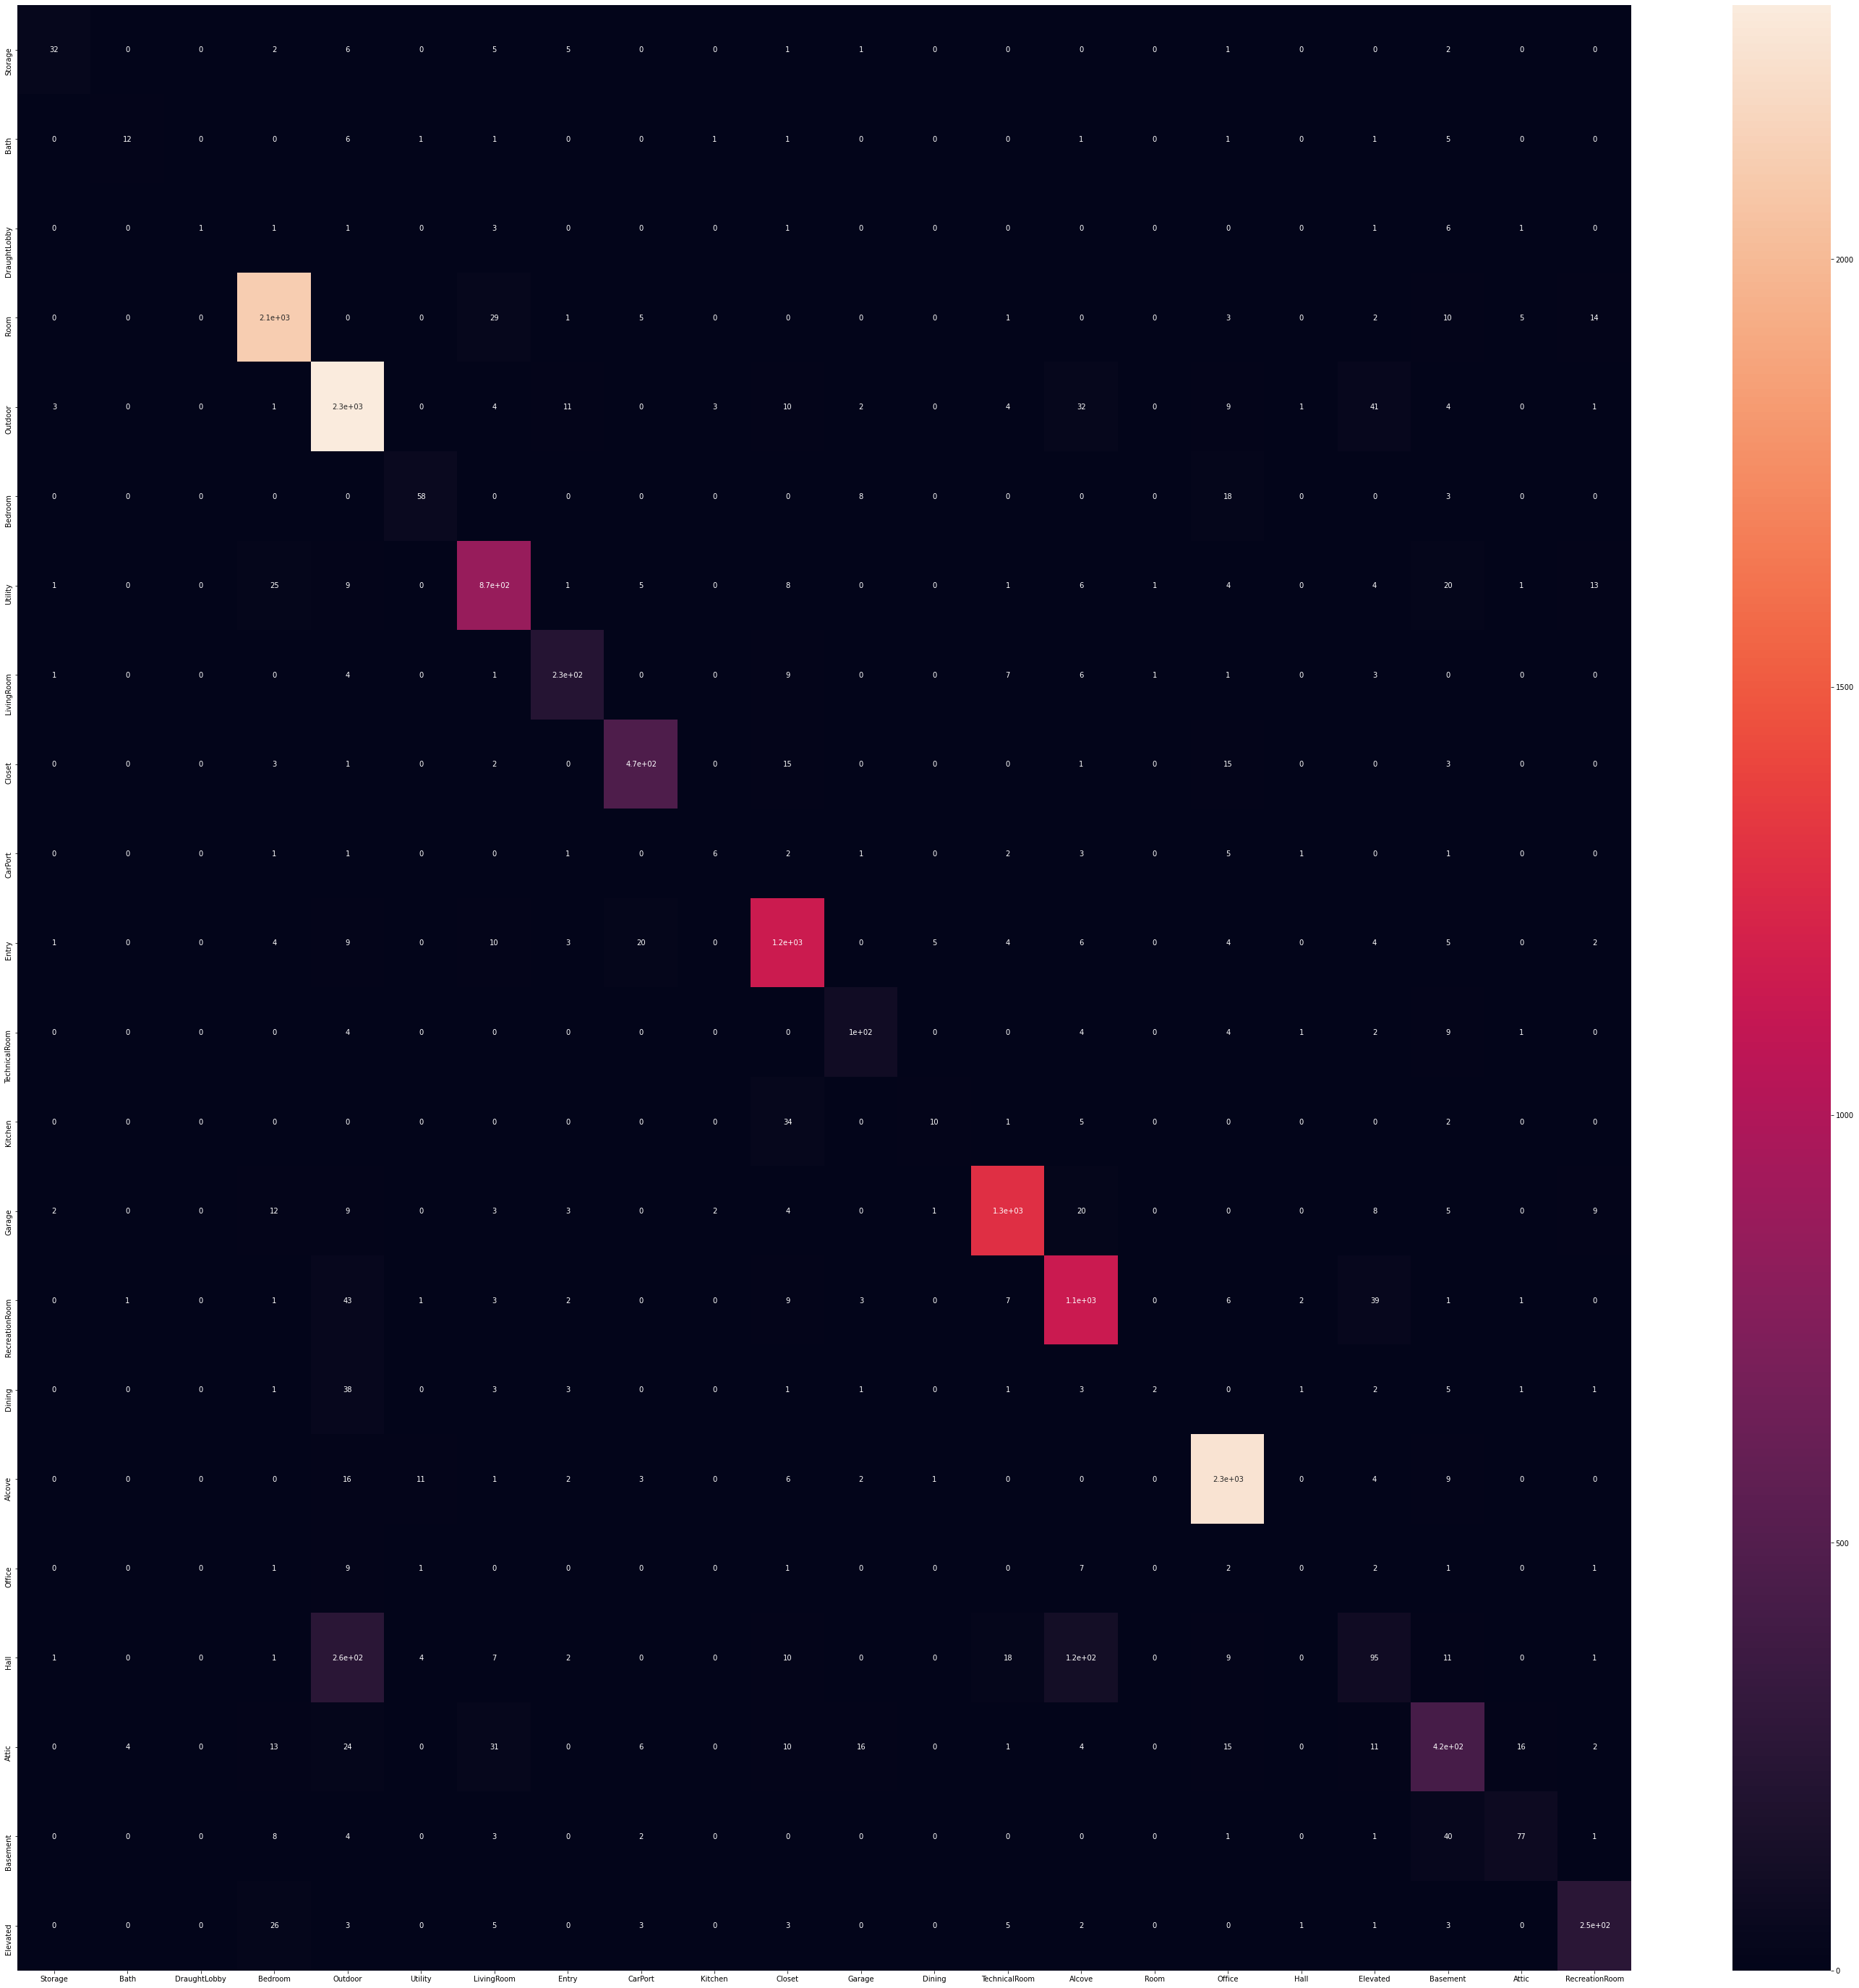

In [62]:
cMat = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(y_pred).unique())
# df_cm = pd.DataFrame(data = cMat)
# df_cm.head()
plt.figure(figsize= (50,50))
sns.heatmap(df_cm, annot=True)

In [11]:
#XGB default parameters
xgb = XGBClassifier(objective='multi:softprob',
                    scale_pos_weight=3,
                    subsample= 0.9,
                    colsample_bytree = 0.6)
print(xgb)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=3, subsample=0.9,
              tree_method=None, validate_parameters=None, verbosity=None)


In [13]:
#Reproductability
seed = 342
np.random.seed(seed)

In [27]:
#Grid Search

#Define CV strategy:
cv = StratifiedKFold(n_splits=5 , shuffle=True, random_state=seed)
#params_grid
params_grid = {
    'max_depth' : [1,3,6],
    'n_estimators' : [200,400],
    'learning_rate' : [0.01, 1] 
                }
params_fixed = {
    'objective' : 'multi:softprob',
                }
bst_grid = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=seed),param_grid=params_grid, cv = cv, scoring='f1_macro')

In [28]:
fit_params = {
        'eval_set':[(X_train, y_train), (X_test, y_test)],
        'eval_metric':['mlogloss','auc'],
        'early_stopping_rounds':10
                }
bst_grid.fit(X_train,y_train,**fit_params)


8617
[97]	validation_0-mlogloss:1.13106	validation_1-mlogloss:1.17896
[98]	validation_0-mlogloss:1.12374	validation_1-mlogloss:1.17189
[99]	validation_0-mlogloss:1.11645	validation_1-mlogloss:1.16487
[100]	validation_0-mlogloss:1.10927	validation_1-mlogloss:1.15796
[101]	validation_0-mlogloss:1.10219	validation_1-mlogloss:1.15114
[102]	validation_0-mlogloss:1.09514	validation_1-mlogloss:1.14438
[103]	validation_0-mlogloss:1.08822	validation_1-mlogloss:1.13772
[104]	validation_0-mlogloss:1.08137	validation_1-mlogloss:1.13116
[105]	validation_0-mlogloss:1.07457	validation_1-mlogloss:1.12461
[106]	validation_0-mlogloss:1.06786	validation_1-mlogloss:1.11816
[107]	validation_0-mlogloss:1.06125	validation_1-mlogloss:1.11182
[108]	validation_0-mlogloss:1.05474	validation_1-mlogloss:1.10555
[109]	validation_0-mlogloss:1.04828	validation_1-mlogloss:1.09934
[110]	validation_0-mlogloss:1.04192	validation_1-mlogloss:1.09324
[111]	validation_0-mlogloss:1.03557	validation_1-mlogloss:1.08713
[112]	va

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=342, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missi...onstraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     re

In [41]:
print('Best params:',bst_grid.best_params_)

Best params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}


In [42]:
bst_pred = bst_grid.predict(X_test)

In [46]:
print(classification_report(y_test,bst_pred))
print(confusion_matrix(y_test,bst_pred))

                precision    recall  f1-score   support

        Alcove       0.70      0.66      0.68        56
         Attic       0.60      0.48      0.53        25
      Basement       0.00      0.00      0.00        16
          Bath       0.97      0.96      0.96      2200
       Bedroom       0.81      0.96      0.88      2377
       CarPort       0.70      0.45      0.55        85
        Closet       0.87      0.92      0.90       828
           Den       0.58      0.47      0.52        81
        Dining       0.88      0.88      0.88       300
  DraughtLobby       0.88      0.93      0.90       501
  DressingRoom       0.62      0.49      0.54       107
      Elevated       0.71      0.18      0.29        28
         Entry       0.91      0.92      0.92      1275
        Garage       0.73      0.70      0.72       134
          Hall       0.88      0.15      0.25        47
       Kitchen       0.97      0.95      0.96      1387
       Library       0.00      0.00      0.00  

In [45]:
# bst_grid.score(X)

ValueError: Expected array-like (array or non-string sequence), got None